# Clustering and Principal Component Analysis (PCA) 
### *~1.4M Asteroids from the JPL Small Body Database* 


In [1]:
from ipyparallel import Client
rc = Client(profile="default")
rc.ids

if len(rc.ids) == 0:
    print("No engines found")
else:
    print(f"{len(rc.ids)} engines found")

4 engines found


In [2]:
%%px
import heat as ht

## Load the data from `hdf5` and preprocessing

This has already been done in the respective notebook, so we skip the details and just proceed as follows: 

In [ ]:
%%px
from heat.preprocessing import StandardScaler
x = ht.load("/p/scratch/training2546/datasets/jplsbdb_asteroids.h5", "properties", device="gpu", split=0)
scaler = StandardScaler(copy=False)
scaler.fit_transform(x)

Out[2:7]: StandardScaler({})

Out[0:7]: StandardScaler({})

Out[1:7]: StandardScaler({})

Out[3:7]: StandardScaler({})

## Clustering with K-Means 

Now, we will do the actual clustering: 

In [4]:
%%px
from heat.cluster import KMeans
kmeans = KMeans(n_clusters=5, init="batchparallel")
kmeans.fit(x)
print(kmeans.labels_)

%px:   0%|          | 0/4 [00:00<?, ?tasks/s]

[stdout:2] 


[stdout:1] 


[stdout:3] 


[stdout:0] DNDarray([[1],
          [0],
          [0],
          ...,
          [3],
          [1],
          [0]], dtype=ht.int64, device=gpu:0, split=0)


## Visualization with PCA 

How do you know whether your results of clustering are meaningful? --- You somehow need to visualize them. As most people (even mathematicians) might have problems visualizing point clouds in more than 4 dimensions (3D space + time), its a convenient option to use dimensionality reduction before vizualization. 

Here, we will use **PCA ("Principal Component Analysis")** for doing so. This technique relies on the mathematical concept of singular value decomposition (SVD); see the Linear Algebra notebook for more details. 

In [5]:
%%px
from heat.decomposition import PCA 
pca = PCA(svd_solver="full")
pca.fit(x)
print(pca.singular_values_)

[stdout:2] 


[stdout:3] 


[stdout:1] 


[stdout:0] DNDarray([2.4105e+03, 1.4566e+03, 1.3290e+03, 1.3022e+03, 1.2496e+03, 1.1295e+03, 1.1131e+03, 1.0657e+03, 9.7940e+02,
          2.4479e+02, 7.0850e-01, 8.1861e-02], dtype=ht.float32, device=gpu:0, split=None)


Once you have computed the PCA of your data, you can project onto the PCA-coordinates (`pca.transform()`) and plot the projected data points for various combinations of PCA-coordinates, here `(1,2)` and `(0,2)`.  

%px:   0%|          | 0/4 [00:00<?, ?tasks/s]

[output:0]

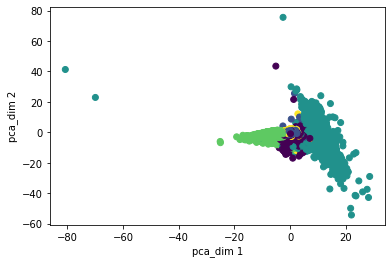

[output:1]

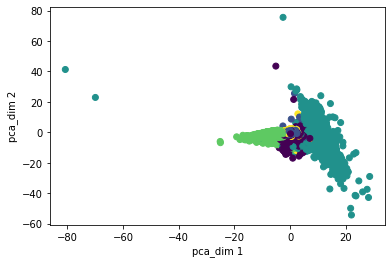

[output:3]

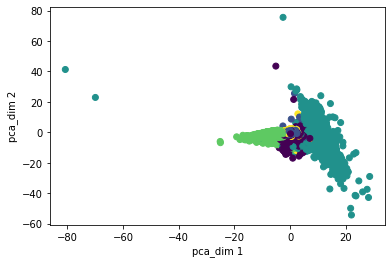

[output:2]

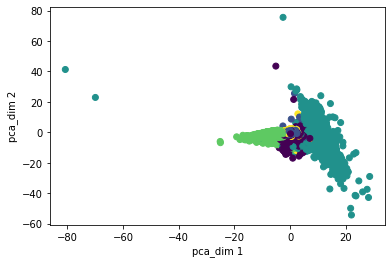

[output:2]

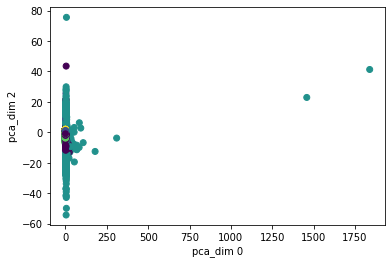

[output:1]

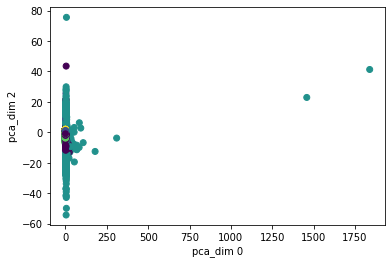

[output:0]

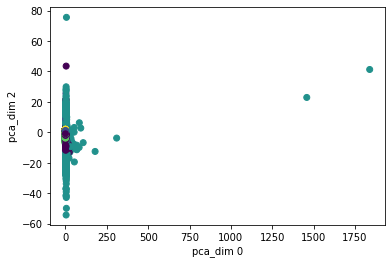

[output:3]

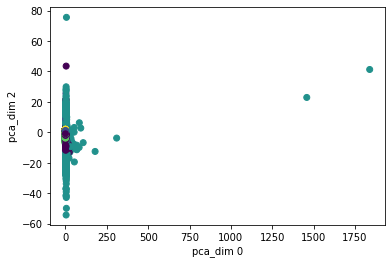

In [ ]:
%%px
import matplotlib.pyplot as plt 
%matplotlib inline

dim_list = [(1,2), (0,2)]
labels = kmeans.labels_.numpy()
for dims in dim_list: 
    y = pca.transform(x)
    first_feature = y[:,dims[0]].numpy()
    second_feature = y[:,dims[1]].numpy()
    plt.figure()
    plt.scatter(first_feature, second_feature, c=labels)
    plt.xlabel(f'pca_dim {dims[0]}')
    plt.ylabel(f'pca_dim {dims[1]}')
    plt.show()